<a href="https://colab.research.google.com/github/Aldodev01/Python-Cars_Predicted_k-nearest-neighbors/blob/main/cars_predicted_kneightboars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Car Prices with K-Nearest Neighbors 🚗**

---
Dalam proyek ini kita akan melihat 'imports-85.data'. 
File ini berisi spesifikasi kendaraan tahun 1985. 
Untuk informasi lebih lanjut tentang kumpulan data klik [disini](https://archive.ics.uci.edu/ml/datasets/automobile). Kita akan mengeksplorasi
dasar-dasar pembelajaran mesin menggunakan algoritma k-nearest neighbor dari scikit-learn. Pertama, kita akan mengimpor perpustakaan yang kita perlukan.


In [ ]:
import pandas as pd #import paket pandas dinamai pd
import numpy as np #import paket numpy dinamai np
from sklearn.neighbors import KNeighborsRegressor #dari paket sklearn.neightbors import kNeighborsRegressor
from sklearn.metrics import mean_squared_error #dari paket sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt #import paket matplotlib.pyplot dinamai plt
%matplotlib inline #Atur matplotlib agar bekerja secara interaktif. Fungsi ini memungkinkan Anda mengaktifkan dukungan interaktif matplotlib kapan saja selama sesi IPython

In [2]:
cars = pd.read_csv("imports-85.data") #membuat variable bernama cars yang menginisialisasi file 'imports-85.data'
cars.head() #menunjukan hasil dari inisialisasi file

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


Sepertinya kumpulan data ini tidak menyertakan nama kolom. Kita harus menambahkan nama kolom secara manual menggunakan dokumentasi [disini](https://archive.ics.uci.edu/ml/datasets/automobile).

In [4]:
colnames = ['simbol', 'normalisasi-kerugian', 'pembuat', 'bahan bakar', 'aspirasi', 'jumlah pintu', 'tipe mobil', 
        'roda-penggerak', 'lokasi-mesin', 'jarak roda', 'panjang', 'berat', 'tinggi', 'berat curb', 'tipe-mesin', 
        'nomor-silinder', 'ukuran-mesin', 'sistem-bahan-bakar', 'bore', 'stroke', 'tingkat kompresi', 'tenaga mobil', 'rpm maksimal', 'city-mpg', 'highway-mpg', 'price']
#data nama untuk columns table 


cars = pd.read_csv("imports-85.data", names=colnames) #memperbarui variable cars yang menginisialisasi file 'imports-85.data' dan mengganti nama head table menjadi data nama table diatas
cars.head() #menunjukan hasil dari inisialisasi file

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# **Pembersihan Data dan Persiapan Fitur**

---
Sepertinya kami berhasil memperbaiki kerangka data. Algoritma k-nearest neighbor menggunakan rumus jarak untuk menentukan tetangga terdekat. Artinya, kami hanya dapat menggunakan kolom numerik untuk algoritma pembelajaran mesin ini. Jadi kita harus melakukan sedikit pembersihan data.

Berikut adalah beberapa masalah dengan kerangka data ini:


*   Ada nilai yang hilang dengan string '?'
*   Ada banyak kolom yang bukan numeric

Pertama, kita akan mengganti nilai string '?' dengan NaN. Dengan begitu, kita bisa menggunakan metode .isnull() untuk menentukan kolom mana yang memiliki nilai yang hilang.

Menggunakan dokumentasi, kita dapat menentukan kolom mana yang numerik. Lalu kita bisa menjatuhkannya dari kerangka data.





In [5]:
cars = cars.replace("?", np.nan) #memperbarui variable cars dengan mengganti semua "?" menjadi "NaN" atau "Not a Number"
to_drop = ["symboling", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "engine-type", "num-of-cylinders", "fuel-system", "engine-size"]
#data nama yang ingin dijatuhkan atau diganti 

cars_num = cars.drop(to_drop, axis=1)
#Jatuhkan label tertentu dari baris atau kolom. Hapus baris atau kolom dengan menentukan nama label dan 
#sumbu yang sesuai, atau dengan menentukan langsung indeks atau nama kolom.

In [6]:
cars_num.head() #menunjukan hasil dari inisialisasi variable

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
cars_num = cars_num.astype("float") #memperbarui variable cars_num dengan mengganti type data dari integer ke float
cars_num.isnull().sum() #.isnull() untuk mendeteksi value null, .sum() mengkalkulasikan data

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [8]:
cars_num = cars_num.dropna(subset=["price"]) #memperbarui variable cars_num dengan .dropna() untuk menghapus value yang null atau data yang hilang pada column table "price"
cars_num.isnull().sum() #.isnull() untuk mendeteksi value null, .sum() mengkalkulasikan data

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [9]:
cars_num = cars_num.fillna(cars_num.mean()) #memperbarui variable cars_num dengan .filna() untuk mengisi nilai NA/NaN menggunakan metode yang ditentukan yang diisi dengan variable cars_num.mean() yang akan mengembalikan nilai rata-rata diatas sumbu yang diminta
cars_num.isnull().sum() #.isnull() untuk mendeteksi value null, .sum() mengkalkulasikan data

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [10]:
cars_num.head() #menunjukan hasil dari inisialisasi variable

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [14]:
normalized_cars = (cars_num-cars_num.mean())/(cars_num.max()-cars_num.min()) #membuat variable normalized_cars yang berisi : nilai rata-rata / (nilai tertinggi - nilai terendah)
normalized_cars['price'] = cars_num['price'] #memperbarui variable normalized_cars pada columns table normalized_cars["price"] ke cars_num["price"]

In [15]:
normalized_cars.head() #menunjukan hasil dari inisialisasi variable

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.000000,-0.297289,-0.080612,-0.152911,-0.413889,-0.002974,0.099492,-0.274716,-0.072767,0.035528,-0.047995,-0.116086,-0.097015,13495.0
1,0.000000,-0.297289,-0.080612,-0.152911,-0.413889,-0.002974,0.099492,-0.274716,-0.072767,0.035528,-0.047995,-0.116086,-0.097015,16500.0
2,0.000000,-0.125277,-0.044791,-0.033253,-0.113889,0.103698,-0.464793,0.101474,-0.072767,0.236463,-0.047995,-0.171642,-0.123331,16500.0
3,0.219895,0.029242,0.035806,0.026577,0.044444,-0.084820,-0.100508,0.068141,-0.010267,-0.006528,0.156087,-0.032753,-0.018068,13950.0
4,0.219895,0.017580,0.035806,0.043671,0.044444,0.104086,-0.100508,0.068141,-0.135267,0.054220,0.156087,-0.199420,-0.228594,17450.0


In [29]:
#Returns the root mean squared error using KNN
def knn_train_test(features, target_col, df): #function knn_train_test yang membutuhkan 3 parameter : features, target_col, df
    #randomize sets
    np.random.seed(1) #data dirandom acak 1x
    randomed_index = np.random.permutation(df.index) #membuat variable randomed_index yang berarti data np yang dirandom permutasi
    randomed_df = df.reindex(randomed_index) #membuat variable randomed_df yang berarti data df yang di urutkan kembali
    
    half_point = int(len(randomed_df)/2) #membuat variable half_point yang berarti mengubah type data ke Integer dari jumlah item yang telah diurutkan kembali lalu di bagi 2
    
    #assign test and training sets
    train_df = randomed_df.iloc[0:half_point] #
    test_df = randomed_df.iloc[half_point:]
    
    #training
    knn = KNeighborsRegressor()
    knn.fit(train_df[[features]], train_df[[target_col]])
    
    #test
    predictions = knn.predict(test_df[[features]])
    mse = mean_squared_error(test_df[[target_col]], predictions)
    rmse = mse**0.5
    return rmse

In [30]:
features = normalized_cars.columns.drop('price')
rmse = {}
for item in features:
    rmse[item] = knn_train_test(item, 'price', normalized_cars)

results = pd.Series(rmse)
results.sort_values()

horsepower           4053.515774
curb-weight          4408.845891
city-mpg             4484.737137
highway-mpg          4653.278022
width                4845.576012
length               5451.885643
wheel-base           5521.823335
compression-rate     6209.605840
bore                 6931.428437
peak-rpm             7609.918766
normalized-losses    7662.642406
height               8024.764211
stroke               8234.903787
dtype: float64

In [34]:
def knn_train_test2(features, target_col, df, k_values):
    #randomize sets
    np.random.seed(1)
    randomed_index = np.random.permutation(df.index)
    randomed_df = df.reindex(randomed_index)
    
    half_point = int(len(randomed_df)/2)
    
    #assign test and training sets
    train_df = randomed_df.iloc[0:half_point]
    test_df = randomed_df.iloc[half_point:]
    
    k_rmse = {}
    #training
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[features]], train_df[[target_col]])
        
        #test
        predictions = knn.predict(test_df[[features]])
        mse = mean_squared_error(test_df[[target_col]], predictions)
        rmse = mse**0.5
        k_rmse[k] = rmse
    return k_rmse


In [35]:
#input k parameter as a list, use function to return a dictionary of dictionaries
k = [1, 3, 5, 7, 9]
features = normalized_cars.columns.drop('price')
feature_k_rmse = {}

for item in features:
    feature_k_rmse[item] = knn_train_test2(item, 'price', normalized_cars, k)
    
feature_k_rmse

{'normalized-losses': {1: 8790.212314537885,
  3: 6875.654986461238,
  5: 7662.642405544416,
  7: 7515.63608443674,
  9: 7790.812020264222},
 'wheel-base': {1: 4590.747907099088,
  3: 5259.776225648235,
  5: 5521.823335037651,
  7: 5473.605241194472,
  9: 5767.1475844306115},
 'length': {1: 5576.195527808941,
  3: 5309.223449937301,
  5: 5451.88564287351,
  7: 5439.35938822334,
  9: 5394.358515005484},
 'width': {1: 4697.349702515534,
  3: 4704.083232618864,
  5: 4845.576012434149,
  7: 4784.947408125292,
  9: 4733.657898986014},
 'height': {1: 8975.203735242389,
  3: 8464.190372260407,
  5: 8024.7642106195,
  7: 7835.560824976567,
  9: 7839.824707265792},
 'curb-weight': {1: 5536.7122093449025,
  3: 5011.8789151002,
  5: 4408.845891011963,
  7: 4369.907257168022,
  9: 4632.4968297763335},
 'bore': {1: 6428.740091831123,
  3: 7152.415133430392,
  5: 6931.428437155356,
  7: 7274.920723015948,
  9: 6854.339430578321},
 'stroke': {1: 6691.373640592775,
  3: 7208.967660828664,
  5: 8234.90

normalized-losses
average_rmse: 7726.991562248901
wheel-base
average_rmse: 5322.620058682011
length
average_rmse: 5434.204504769715
width
average_rmse: 4753.12285093597
height
average_rmse: 8227.90877007293
curb-weight
average_rmse: 4791.968220480284
bore
average_rmse: 6928.368763202228
stroke
average_rmse: 7510.502100348797
compression-rate
average_rmse: 6769.339906916257
horsepower
average_rmse: 4267.506031138859
peak-rpm
average_rmse: 7999.63718543421
city-mpg
average_rmse: 4678.063371059761
highway-mpg
average_rmse: 5069.663625354906


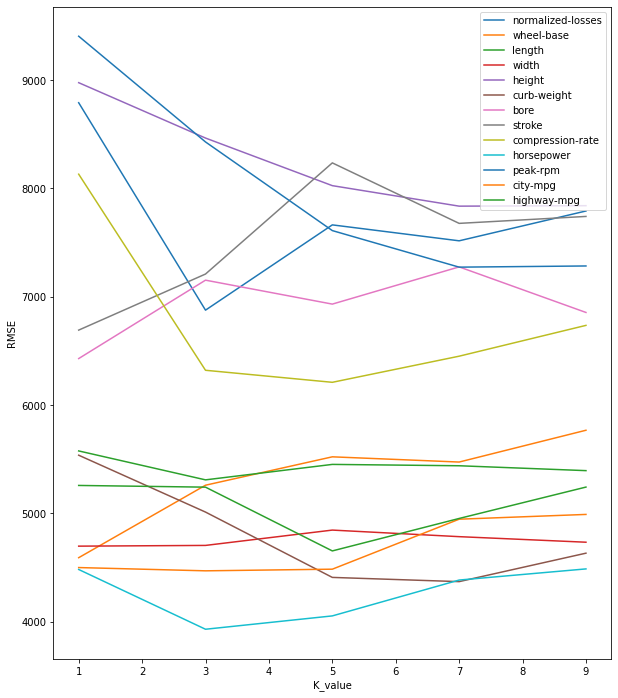

In [19]:
best_features = {}
plt.figure(figsize=(10, 12))

for key, value in feature_k_rmse.items():
    x = list(value.keys())
    y = list(value.values())
    
    order = np.argsort(x)
    x_ordered = np.array(x)[order]
    y_ordered = np.array(y)[order]
    print(key)
    print('average_rmse: '+str(np.mean(y)))
    best_features[key] = np.mean(y)

    plt.plot(x_ordered, y_ordered, label=key)
    plt.xlabel("K_value")
    plt.ylabel("RMSE")
plt.legend()
plt.show()

In [20]:
sorted_features_list = sorted(best_features, key=best_features.get)
sorted_features_list

['horsepower',
 'city-mpg',
 'width',
 'curb-weight',
 'highway-mpg',
 'wheel-base',
 'length',
 'compression-rate',
 'bore',
 'stroke',
 'normalized-losses',
 'peak-rpm',
 'height']

In [31]:
def knn_train_test3(features, target_col, df):
    #randomize sets
    np.random.seed(0)
    randomed_index = np.random.permutation(df.index)
    randomed_df = df.reindex(randomed_index)
    
    half_point = int(len(randomed_df)/2)
    
    #assign test and training sets
    train_df = randomed_df.iloc[0:half_point]
    test_df = randomed_df.iloc[half_point:]
    
    #training
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(train_df[features], train_df[[target_col]])
    #test
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df[[target_col]], predictions)
    rmse = mse**0.5
    return rmse

In [32]:
k_rmse_features ={}

best_two_features = sorted_features_list[0:2]
best_three_features = sorted_features_list[0:3]
best_four_features = sorted_features_list[0:4]
best_five_features = sorted_features_list[0:5]


k_rmse_features["best_two_rmse"]  = knn_train_test3(best_two_features, 'price', normalized_cars)
k_rmse_features["best_three_rmse"] = knn_train_test3(best_three_features, 'price', normalized_cars)
k_rmse_features["best_four_rmse"] = knn_train_test3(best_four_features, 'price', normalized_cars)
k_rmse_features["best_five_rmse"] = knn_train_test3(best_five_features, 'price', normalized_cars)

In [33]:
k_rmse_features

{'best_two_rmse': 4240.811513971083,
 'best_three_rmse': 3341.98923367802,
 'best_four_rmse': 3486.034346836923,
 'best_five_rmse': 3486.5563456917153}

In [24]:
def knn_train_test4(features, target_col, df, k_values):
    #randomize sets
    np.random.seed(0)
    randomed_index = np.random.permutation(df.index)
    randomed_df = df.reindex(randomed_index)
    
    half_point = int(len(randomed_df)/2)
    
    #assign test and training sets
    train_df = randomed_df.iloc[0:half_point]
    test_df = randomed_df.iloc[half_point:]
    
    k_rmse = {}
    #training
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[features], train_df[[target_col]])
        #test
        predictions = knn.predict(test_df[features])
        mse = mean_squared_error(test_df[[target_col]], predictions)
        rmse = mse**0.5
        k_rmse[k] = rmse
    return k_rmse

In [25]:
#input k parameter as a list, use function to return a dictionary of dictionaries
k = list(range(1,25))
features = [best_three_features, best_four_features, best_five_features]
feature_k_rmse2 = {}
feature_k_rmse2["best_three_features"] = knn_train_test4(best_three_features, 'price', normalized_cars, k)
feature_k_rmse2["best_four_features"] = knn_train_test4(best_four_features, 'price', normalized_cars, k)
feature_k_rmse2["best_five_features"] = knn_train_test4(best_five_features, 'price', normalized_cars, k)

In [26]:
feature_k_rmse2

{'best_three_features': {1: 3958.3500713212206,
  2: 3329.48024293865,
  3: 3307.55514536099,
  4: 3434.0956647498137,
  5: 3341.98923367802,
  6: 3311.5753759044997,
  7: 3393.0811537453983,
  8: 3600.4539933500328,
  9: 3799.5751322902656,
  10: 3941.262487672278,
  11: 4029.682259802383,
  12: 4087.7627555390313,
  13: 4130.230441828527,
  14: 4155.406595877963,
  15: 4115.4387504214965,
  16: 4067.401394535558,
  17: 4117.768659324368,
  18: 4127.539190057759,
  19: 4153.143344873938,
  20: 4215.675372087109,
  21: 4205.580136254553,
  22: 4232.111820956601,
  23: 4273.598357300247,
  24: 4265.376251373746},
 'best_four_features': {1: 2746.0350678859522,
  2: 2941.341453661867,
  3: 3074.430719259218,
  4: 3470.497779283953,
  5: 3486.034346836923,
  6: 3464.0574007574664,
  7: 3525.6300493525923,
  8: 3414.395906625097,
  9: 3457.742671682161,
  10: 3637.5764873588755,
  11: 3652.4080822828937,
  12: 3652.786384398834,
  13: 3726.162689056721,
  14: 3803.323931784786,
  15: 3729.6

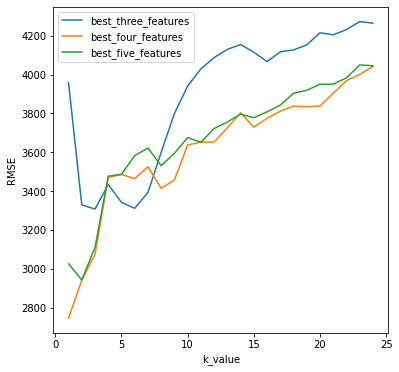

In [27]:
plt.figure(figsize=(6, 6))

for key, value in feature_k_rmse2.items():
    
    x = list(value.keys())
    y = list(value.values())
    plt.plot(x, y, label=key)
    plt.xlabel("k_value")
    plt.ylabel("RMSE")
    
plt.legend()
plt.show()

Learning Summary
Concepts explored: pandas, data cleaning, features engineering, k-nearest neighbors, hyperparameter tuning, RMSE

Functions and methods used: .read_csv(), .replace(), .drop(), .astype(), isnull().sum(), .min(), .max(), .mean(), .permutation(), .reindex(), .iloc[], .fit(), .predict(), mean_squared_error(), .Series(), .sort_values(), .plot(), .legend()

Ringkasan Pembelajaran 
Package dan konsep yang dieksplorasi: pandas, data cleaning, features engineering, k-nearest neighbors, hyperparameter tuning, RMSE 

Fungsi dan metode yang digunakan: .read_csv(), .replace(), .drop(), .astype(), isnull().sum(), .min(), .max(), .mean(), .permutation (), .reindex(), .iloc[], .fit(), .predict(), mean_squared_error(), .Series(), .sort_values(), .plot(), .legend()
